In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/content/placement.csv')

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [7]:
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
import matplotlib.pyplot as plt


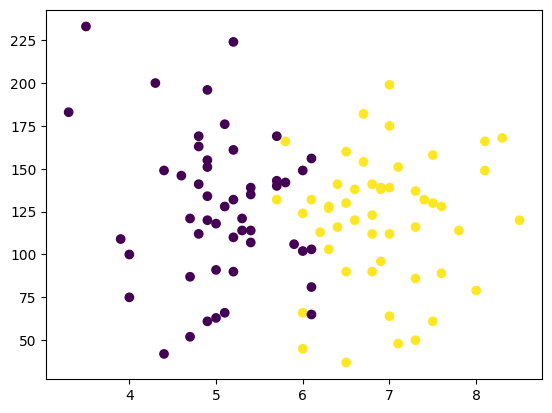

In [11]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [12]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_train

array([[-9.43157735e-01,  7.49647483e-01],
       [ 4.44122284e-01, -8.21630832e-01],
       [ 1.13776229e+00, -9.18324882e-01],
       [ 6.17532286e-01,  1.40233232e+00],
       [-1.02986274e+00,  1.08807666e+00],
       [ 1.05972779e-02,  6.04606408e-01],
       [-2.49517725e-01,  4.59565333e-01],
       [-5.09632729e-01, -2.41466531e-01],
       [ 1.31117229e+00,  8.22168021e-01],
       [-1.20327274e+00,  5.32085870e-01],
       [ 1.31117229e+00, -1.52266270e+00],
       [ 1.05972779e-02, -1.90943890e+00],
       [-8.56452733e-01, -1.47431567e+00],
       [-8.56452733e-01, -7.97457319e-01],
       [ 2.70712281e-01,  7.27891322e-02],
       [ 9.64352290e-01, -1.83691836e+00],
       [ 2.17822231e+00, -9.64254556e-02],
       [-1.02986274e+00,  9.43035584e-01],
       [ 2.70712281e-01, -5.07375169e-01],
       [ 9.64352290e-01,  6.52953433e-01],
       [-1.46338774e+00,  1.83745555e+00],
       [ 4.44122284e-01,  1.45309670e-01],
       [-2.15702775e+00,  2.63518146e+00],
       [-1.

In [20]:
X_test = scaler.transform(X_test)

In [21]:
X_test

array([[ 1.3978773 , -0.84580434],
       [-1.02986274,  0.41121831],
       [ 0.79094229,  0.36287128],
       [ 1.13776229,  0.31452426],
       [-0.24951773,  0.3870448 ],
       [-1.02986274, -0.28981356],
       [-0.50963273, -0.41068112],
       [-0.68304273, -0.82163083],
       [ 0.70423729, -0.28981356],
       [-0.24951773,  0.19365669]])

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
clf = LogisticRegression()

In [24]:
# model training

clf.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred = clf.predict(X_test)

In [27]:
y_test

42    1
51    0
60    1
61    1
36    0
59    0
81    0
28    0
93    1
87    1
Name: placement, dtype: int64

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred)

0.9

In [30]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

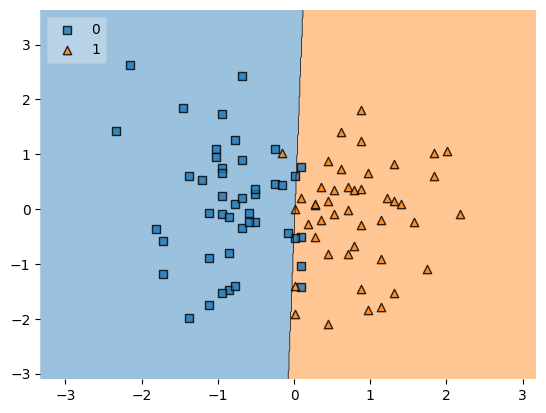

In [31]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [32]:
import pickle

In [33]:
pickle.dump(clf,open('model.pkl','wb'))